In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Load the dataset
file_path = '/content/drive/MyDrive/LSMS - Research Project/Identify Diseases/Anemia/Anemia.csv'
df = pd.read_csv(file_path)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df.replace(["Male","Female"],[int(1),int(0)],inplace=True)

In [5]:
# Display basic information
print(df.head())


   Hemoglobin   MCH  MCHC   MCV  GENDER      RESULT
0        14.9  22.7  29.1  83.7       1  Not Anemia
1        15.9  25.4  28.3  72.0       0  Not Anemia
2         9.0  21.5  29.6  71.2       0      Anemia
3        14.9  16.0  31.4  87.5       0  Not Anemia
4        14.7  22.0  28.2  99.5       1  Not Anemia


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hemoglobin  1421 non-null   float64
 1   MCH         1421 non-null   float64
 2   MCHC        1421 non-null   float64
 3   MCV         1421 non-null   float64
 4   GENDER      1421 non-null   int64  
 5   RESULT      1421 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 66.7+ KB
None


In [7]:
print(df.shape)

(1421, 6)


In [8]:
df.isnull().sum()

,0
Hemoglobin,0
MCH,0
MCHC,0
MCV,0
GENDER,0
RESULT,0


In [9]:
df.columns

Index(['Hemoglobin', 'MCH', 'MCHC', 'MCV', 'GENDER', 'RESULT'], dtype='object')

In [10]:
df["RESULT"].unique()

array(['Not Anemia', 'Anemia'], dtype=object)

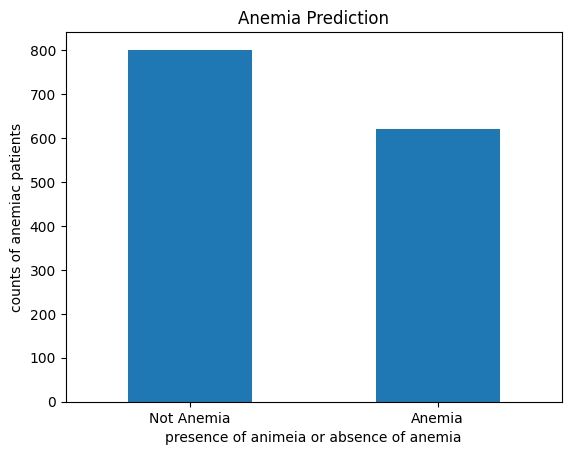

In [11]:
df["RESULT"].value_counts().plot.bar()
plt.title("Anemia Prediction")
plt.xlabel("presence of animeia or absence of anemia")
plt.ylabel("counts of anemiac patients")
plt.xticks(rotation=0)
plt.show()

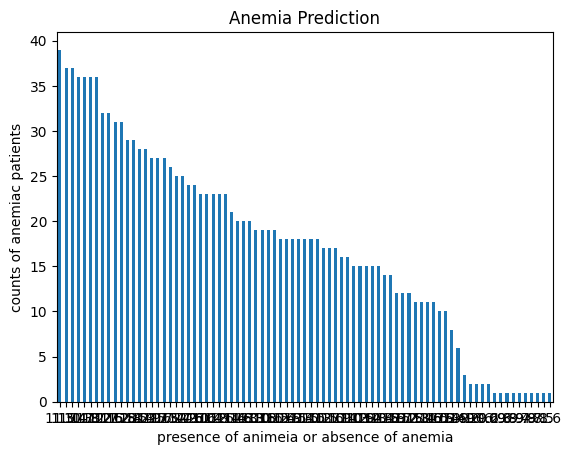

In [12]:
df["Hemoglobin"].value_counts().plot.bar()
plt.title("Anemia Prediction")
plt.xlabel("presence of animeia or absence of anemia")
plt.ylabel("counts of anemiac patients")
plt.xticks(rotation=0)
plt.show()

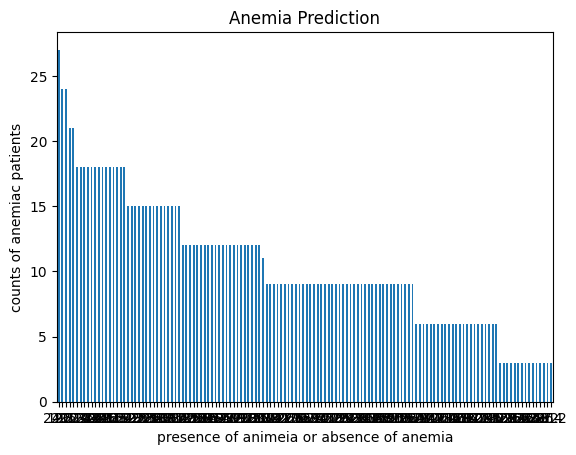

In [13]:
df["MCH"].value_counts().plot.bar()
plt.title("Anemia Prediction")
plt.xlabel("presence of animeia or absence of anemia")
plt.ylabel("counts of anemiac patients")
plt.xticks(rotation=0)
plt.show()

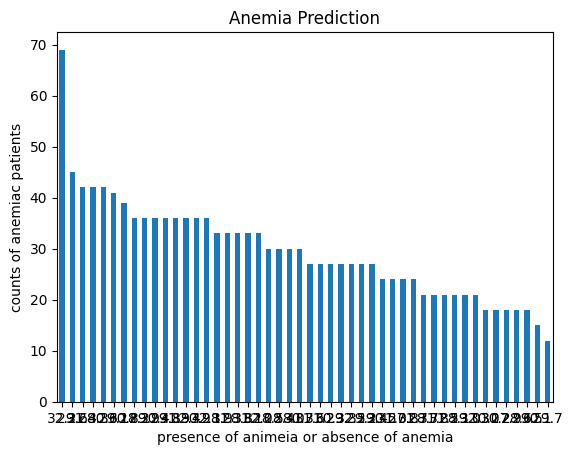

In [14]:
df["MCHC"].value_counts().plot.bar()
plt.title("Anemia Prediction")
plt.xlabel("presence of animeia or absence of anemia")
plt.ylabel("counts of anemiac patients")
plt.xticks(rotation=0)
plt.show()

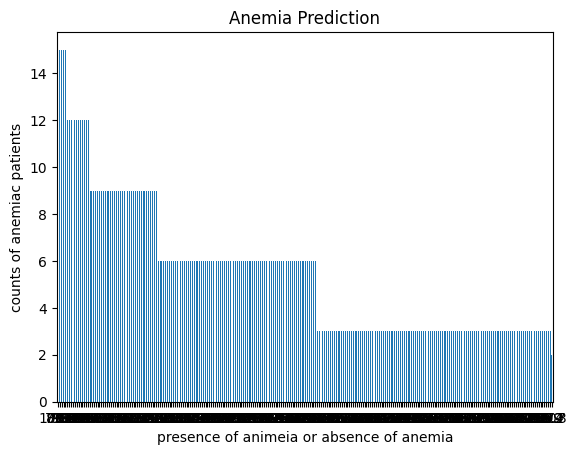

In [15]:
df["MCV"].value_counts().plot.bar()
plt.title("Anemia Prediction")
plt.xlabel("presence of animeia or absence of anemia")
plt.ylabel("counts of anemiac patients")
plt.xticks(rotation=0)
plt.show()

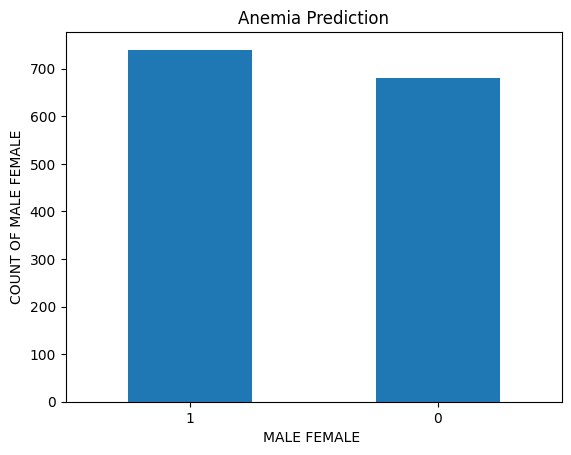

In [16]:
df["GENDER"].value_counts().plot.bar()
plt.title("Anemia Prediction")
plt.xlabel("MALE FEMALE ")
plt.ylabel("COUNT OF MALE FEMALE")
plt.xticks(rotation=0)
plt.show()

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
X=df[["Hemoglobin", "MCH", "MCHC", "MCV", "GENDER"]]

In [19]:
X.head()

,Hemoglobin,MCH,MCHC,MCV,GENDER
0,14.9,22.7,29.1,83.7,1
1,15.9,25.4,28.3,72.0,0
2,9.0,21.5,29.6,71.2,0
3,14.9,16.0,31.4,87.5,0
4,14.7,22.0,28.2,99.5,1


In [20]:
Y=df[["RESULT"]]

In [21]:
Y.head()

,RESULT
0,Not Anemia
1,Not Anemia
2,Anemia
3,Not Anemia
4,Not Anemia


In [22]:
# Prepare dataset for training
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.40,random_state=25)

In [23]:
x_train.shape

(852, 5)

In [24]:
y_train.shape

(852, 1)

In [25]:
x_test.shape

(569, 5)

In [26]:
y_test.shape

(569, 1)

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features='sqrt', n_estimators=200)
rf.fit(x_train, y_train)
rf_score = rf.score(x_test, y_test) * 100
print(f"Random Forest Classifier Accuracy : {rf_score:.2f}%")

Random Forest Classifier Accuracy : 100.00%


In [28]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=0,max_iter=3000)
lr.fit(x_train, y_train)
lr_score=lr.score(x_test,y_test)*100
print(f"LogisticRegression Accuracy : {lr_score:.2f}%")

LogisticRegression Accuracy : 98.77%


In [29]:
from sklearn.svm import SVC

svc = SVC()  # Initialize SVC
svc.fit(x_train, y_train)  # Train the model
svc_score = svc.score(x_test, y_test) * 100  # Calculate accuracy
print(f"SVC Accuracy: {svc_score:.2f}%")

SVC Accuracy: 89.63%


In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()  # Initialize KNN
knn.fit(x_train, y_train)  # Train the model
knn_score = knn.score(x_test, y_test) * 100  # Calculate accuracy
print(f"KNN Accuracy: {knn_score:.2f}%")

KNN Accuracy: 84.89%


In [31]:
from sklearn.tree import DecisionTreeClassifier

dc=DecisionTreeClassifier()
dc.fit(x_train, y_train)
dc_score=dc.score(x_test,y_test)*100
print(f"Decision Tree Classifier Accuracy: {dc_score:.2f}%")

Decision Tree Classifier Accuracy: 100.00%


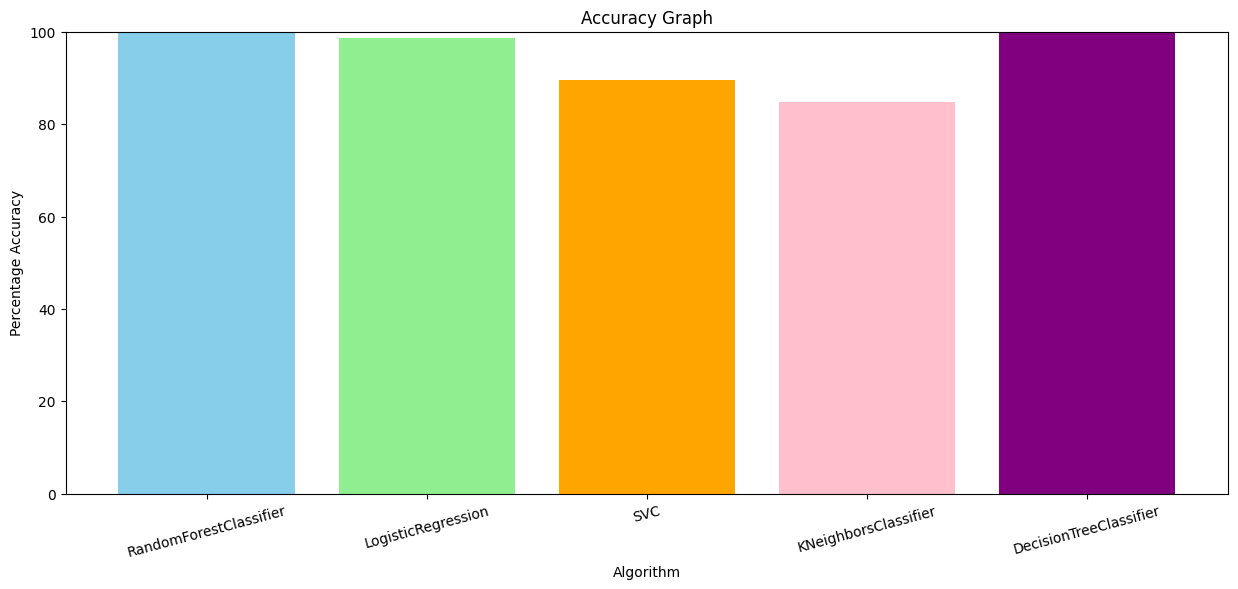

In [32]:
a = ["RandomForestClassifier", "LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier"]
b = [rf_score, lr_score, svc_score, knn_score, dc_score]

# Define a list of colors
colors = ['skyblue', 'lightgreen', 'orange', 'pink', 'purple']

plt.figure(figsize=(15, 6))
plt.bar(a, b, color=colors)  # Pass the color list
plt.title("Accuracy Graph")
plt.xlabel("Algorithm")
plt.ylabel("Percentage Accuracy")
plt.ylim(0, 100)  # Ensure y-axis limits show percentages properly
plt.xticks(rotation=15)
plt.show()


In [33]:
# Find the best model based on accuracy
scores = [rf_score, lr_score, svc_score, knn_score, dc_score]
models = ["RandomForestClassifier", "LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier"]

# Identify the best model
best_model_name = models[scores.index(max(scores))]
print(f"Best model based on accuracy: {best_model_name}")


Best model based on accuracy: RandomForestClassifier


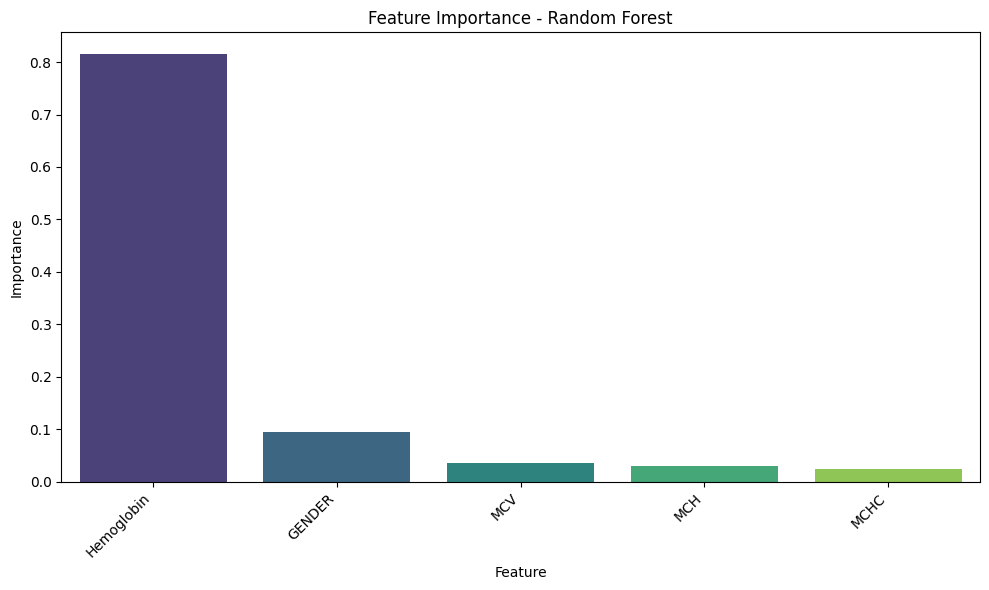

In [34]:
# Ensure feature_importance and feature names are aligned
feature_importance = rf.feature_importances_
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Feature', y='Importance', palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [35]:
# Save the best model to a file
joblib.dump(rf, 'anemia_model_v2.joblib')
print("Best model saved as 'best_anemia_model.joblib'.")

Best model saved as 'best_anemia_model.joblib'.


In [36]:
result=rf.predict([[13,22.7,35.5,85.6,1]])

In [37]:
result

array(['Anemia'], dtype=object)

In [38]:
result_percentage=rf.predict_proba([[13,22.7,35.5,85.6,1]])

In [39]:
result_percentage*100

array([[90.5,  9.5]])

In [40]:
max(result_percentage[0])

np.float64(0.905)

In [41]:
max(result_percentage[0])*100

np.float64(90.5)

In [42]:
round(max(result_percentage[0])*100,2)

np.float64(90.5)

In [43]:
print(round(max(result_percentage[0])*100,2),"presence of",result[0])

90.5 presence of Anemia


RandomForest - Training Accuracy: 100.00%, Validation Accuracy: 100.00%
LogisticRegression - Training Accuracy: 99.06%, Validation Accuracy: 98.77%
SVC - Training Accuracy: 91.08%, Validation Accuracy: 89.63%
KNN - Training Accuracy: 93.66%, Validation Accuracy: 84.89%
DecisionTree - Training Accuracy: 100.00%, Validation Accuracy: 100.00%


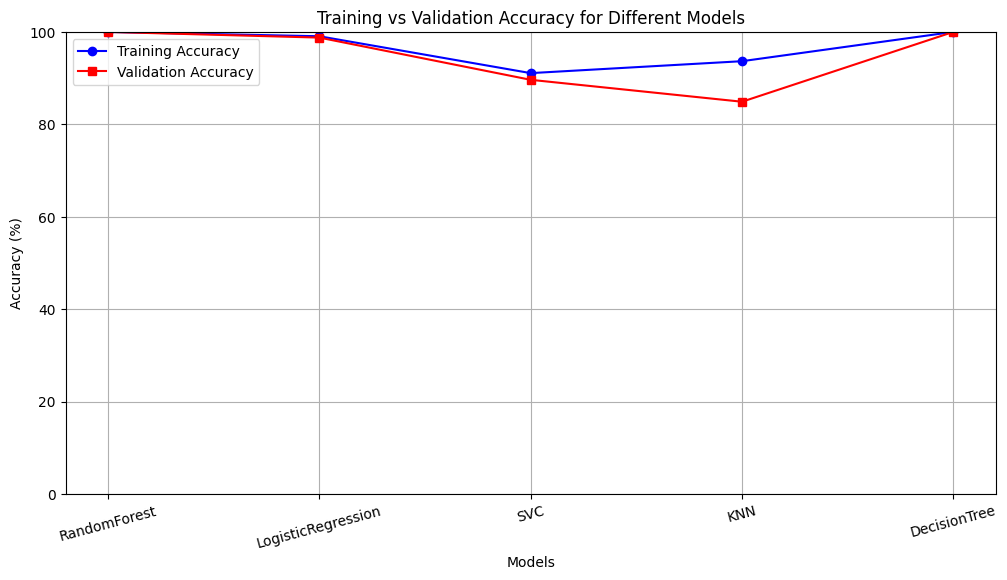

In [44]:
# Initialize models in a dictionary
models = {
    "RandomForest": RandomForestClassifier(max_features='sqrt', n_estimators=200),
    "LogisticRegression": LogisticRegression(random_state=0, max_iter=3000),
    "SVC": SVC(probability=True),  # Enable probability for consistency
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier()
}

# Dictionaries to store accuracies
train_accuracies = {}
test_accuracies = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(x_train, y_train)  # Train the model
    train_accuracy = model.score(x_train, y_train) * 100  # Training accuracy
    test_accuracy = model.score(x_test, y_test) * 100  # Validation accuracy

    train_accuracies[name] = train_accuracy
    test_accuracies[name] = test_accuracy

    print(f"{name} - Training Accuracy: {train_accuracy:.2f}%, Validation Accuracy: {test_accuracy:.2f}%")

# 📈 Plot Training and Validation Accuracy (Line Graph)
plt.figure(figsize=(12, 6))

# X-axis labels (model names)
models_list = list(models.keys())

# Plot Training Accuracy
plt.plot(models_list, list(train_accuracies.values()), marker='o', linestyle='-', color='blue', label="Training Accuracy")

# Plot Validation Accuracy
plt.plot(models_list, list(test_accuracies.values()), marker='s', linestyle='-', color='red', label="Validation Accuracy")

plt.title("Training vs Validation Accuracy for Different Models")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.xticks(rotation=15)
plt.legend()  # Show legend
plt.grid(True)  # Show grid lines
plt.show()


In [ ]:
hemo=float(input('Enter the Heamoglobin level '))
mch=float(input('Enter the MCH level '))
mchc=float(input('Enter the MCHC '))
mcv=float(input('Enter the MCV '))
gen=float(input('Enter the Gender '))
result=rf.predict([[hemo,mch,mchc,mcv,gen]])
# ["Hemoglobin", "MCH", "MCHC", "MCV", "GENDER"]
result_percentage=rf.predict_proba([[hemo,mch,mchc,mcv,gen]])
print(round(max(result_percentage[0])*100,2),"% it is ",result[0])


In [ ]:
import numpy as np

def predict_anemia_with_probability(model, hemoglobin, mch, mchc, mcv, gender):
    """
    Predicts whether a patient has anemia or not and provides the probability of each outcome.

    Parameters:
    - model: Trained RandomForestClassifier instance.
    - hemoglobin (float): Hemoglobin level.
    - mch (float): Mean Corpuscular Hemoglobin.
    - mchc (float): Mean Corpuscular Hemoglobin Concentration.
    - mcv (float): Mean Corpuscular Volume.
    - gender (int): Gender (0 for Female, 1 for Male).

    Returns:
    - Prediction (str): "Not Anemia" or "Anemia".
    - Probabilities (dict): Probability percentages for each class.
    """
    # Ensure gender is encoded correctly
    if gender not in [0, 1]:
        raise ValueError("Gender must be 0 (Female) or 1 (Male).")

    # Prepare input as a 2D array for the model
    input_data = np.array([[hemoglobin, mch, mchc, mcv, gender]])

    # Make prediction and get probabilities
    prediction = model.predict(input_data)[0]
    prob = model.predict_proba(input_data)
    # print(prediction)

    probabilities = round(max(prob[0])*100,2)

    # Map prediction to label
    # prediction_label = "Not Anemia" if prediction == 0 else "Anemia"

    # Map probabilities to human-readable format


    return prediction, probabilities

# Example usage:
# Assuming `rf` is the trained RandomForestClassifier instance
result, probabilities = predict_anemia_with_probability(
    rf, hemoglobin=100, mch=200, mchc=150, mcv=150, gender=1
)
print(f"Prediction: {result}")
print(f"Probabilities: {probabilities}%")
